# EDA Project-2: Hotel Booking

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset
data=pd.read_csv(r"C:\Users\PMLS\OneDrive\Desktop\CAREER\CODEX CUE INTERNSHIP\hotel_booking.csv")

# Display the First row of Dataset
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
data.shape

(119390, 36)

In [5]:
#Display Summary Statistics of the data
(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Convert 'reservation_status_date' column to datetime format
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [7]:
# Convert 'is_canceled' column to categorical type
data['is_canceled'] = data['is_canceled'].astype('category')

In [8]:
#Display Basic Statistical Details
(data.describe())

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


## Handle Missing Data

In [10]:
#check for missing values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
# Fill missing values in the 'children' column with the median value
median_children = data['children'].median()
data['children'] = data['children'].fillna(median_children)


# Fill missing values in the 'agent' column with the mode value
mode_agent = data['agent'].mode()[0]
data['agent'] = data['agent'].fillna(mode_agent)

# Fill missing values in the 'company' column with the mode value
mode_company = data['company'].mode()[0]
data['company'] = data['company'].fillna(mode_company)

# Fill missing values in the 'country' column with the mode value
mode_company = data['country'].mode()[0]
data['country'] = data['country'].fillna(mode_company)


In [16]:
#check for missing values
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## Exploratory Data Analysis

In [17]:
#Descriptive Statistics
numerical_summary = data.describe()
print(numerical_summary)

           lead_time  arrival_date_year  arrival_date_week_number  \
count  119390.000000      119390.000000             119390.000000   
mean      104.011416        2016.156554                 27.165173   
min         0.000000        2015.000000                  1.000000   
25%        18.000000        2016.000000                 16.000000   
50%        69.000000        2016.000000                 28.000000   
75%       160.000000        2017.000000                 38.000000   
max       737.000000        2017.000000                 53.000000   
std       106.863097           0.707476                 13.605138   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count              119390.000000            119390.000000   
mean                   15.798241                 0.927599   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%         

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


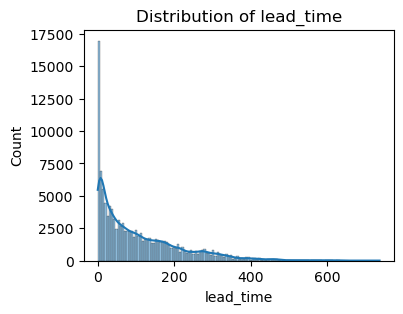

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


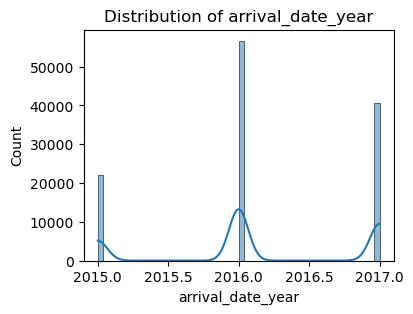

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


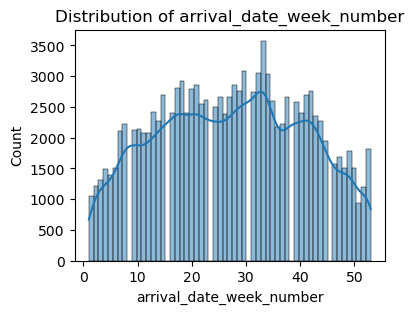

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


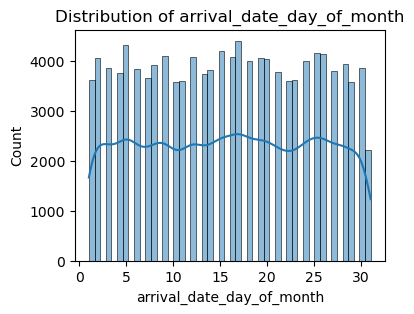

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


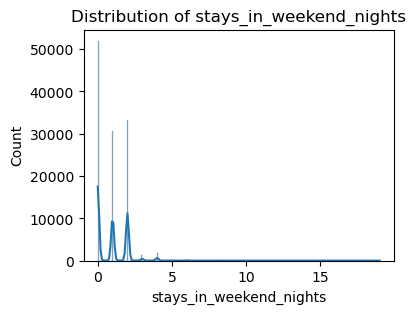

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


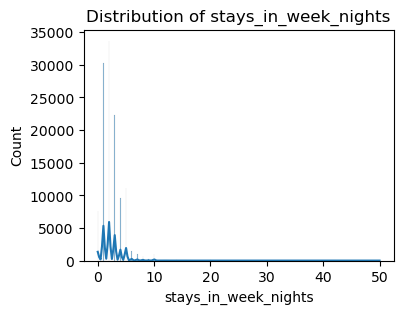

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


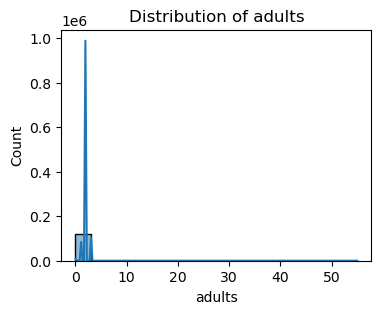

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


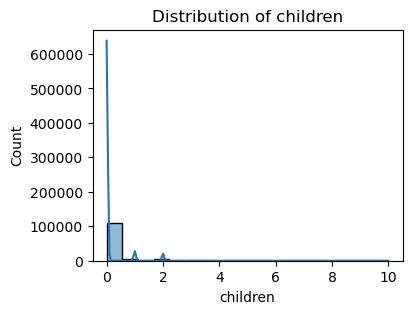

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


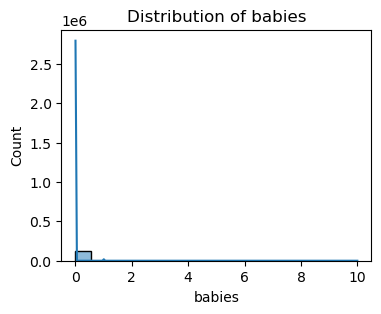

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


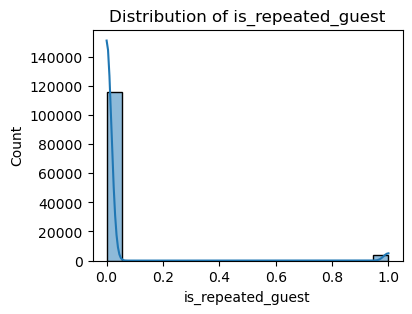

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


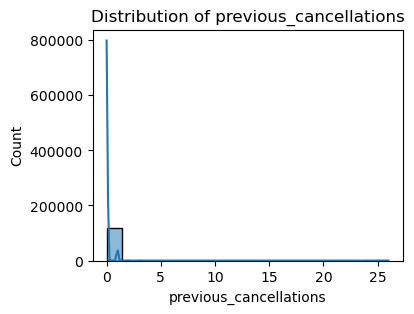

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


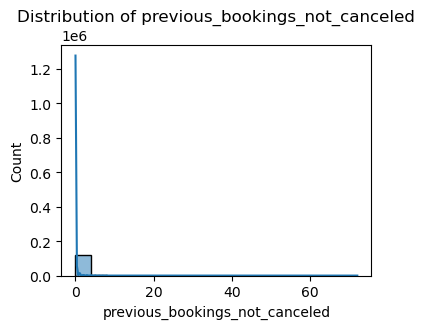

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


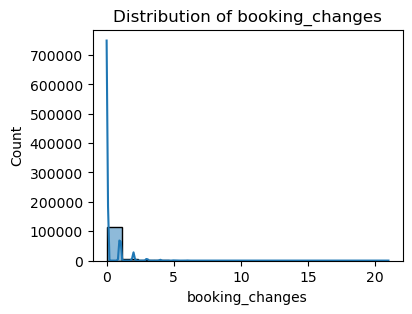

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


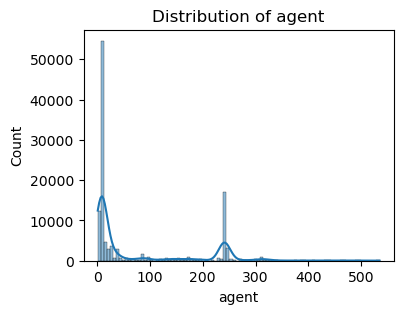

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


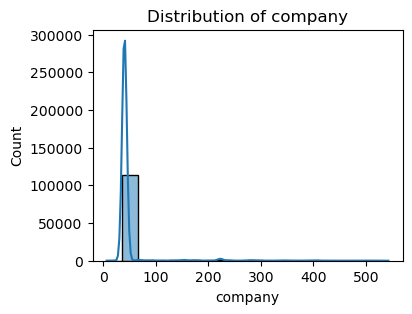

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


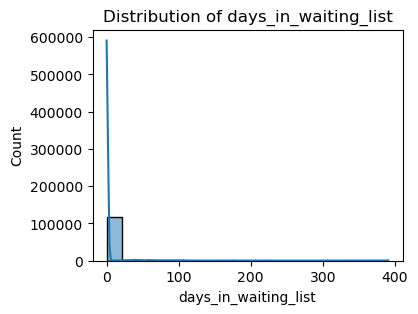

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


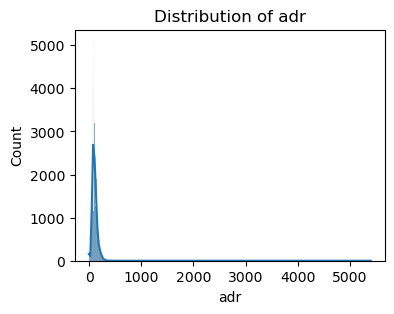

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


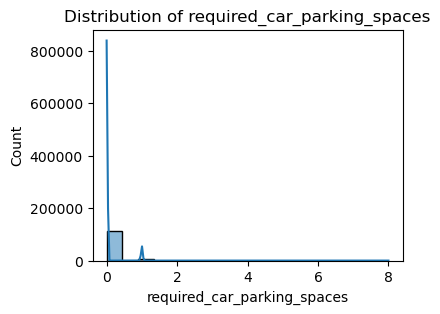

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


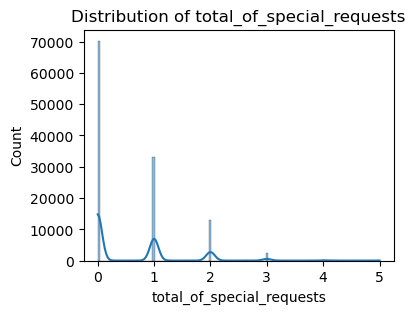

In [20]:
# Histograms for numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(4, 3))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

## Seasonality Analysis

In [22]:
# Define the order of months for categorical conversion
month_order = [ 'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_date_month' to categorical type with specified order
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=month_order, ordered=True)

# Print the converted categorical column
print(data['arrival_date_month'].head())


0    July
1    July
2    July
3    July
4    July
Name: arrival_date_month, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']


C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


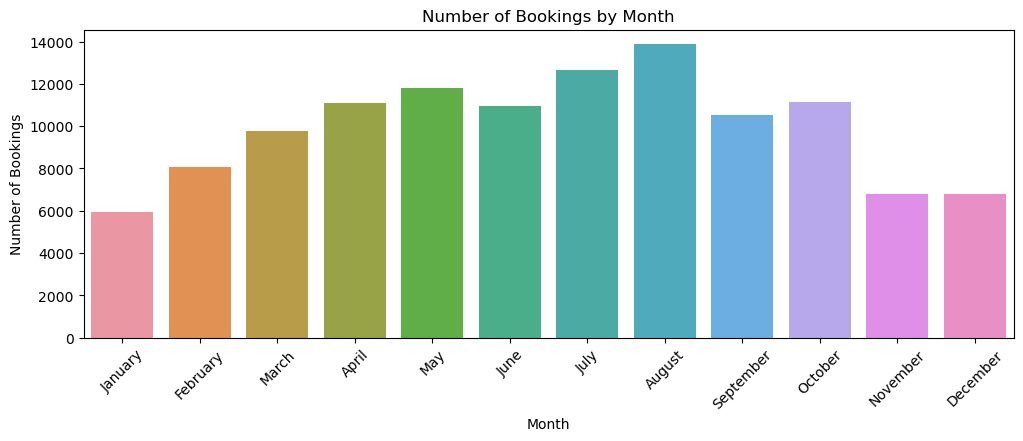

In [41]:
# Plot bookings by month
plt.figure(figsize=(12,4))  
sns.countplot(x='arrival_date_month', data=data, order=data['arrival_date_month'].cat.categories)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.title('Number of Bookings by Month')
plt.show()

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


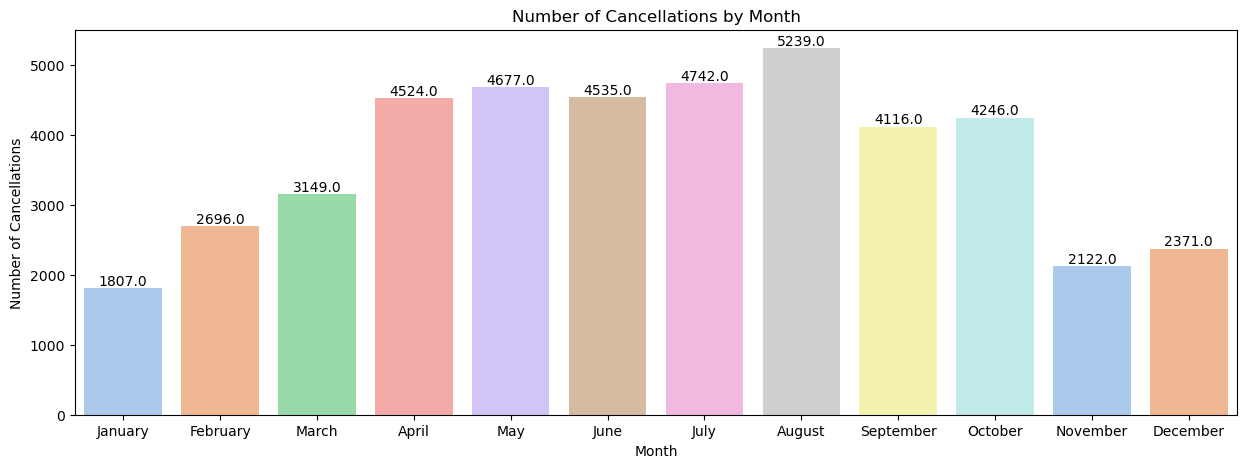

In [49]:
# Ensure 'is_canceled' column is of categorical type
data['is_canceled'] = data['is_canceled'].astype('category')

# Create an ordered categorical type for months to ensure correct ordering
months_order = [ 'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=months_order, ordered=True)

# Filter the data to include only canceled bookings
canceled_data = data[data['is_canceled'] == 1]

# Bar plot for number of cancellations by month
plt.figure(figsize=(15,5))
plot = sns.countplot(data=canceled_data, x='arrival_date_month', palette='pastel')
plt.title('Number of Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')

# Add labels to each bar
for p in plot.patches:
    height = p.get_height()
    plot.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


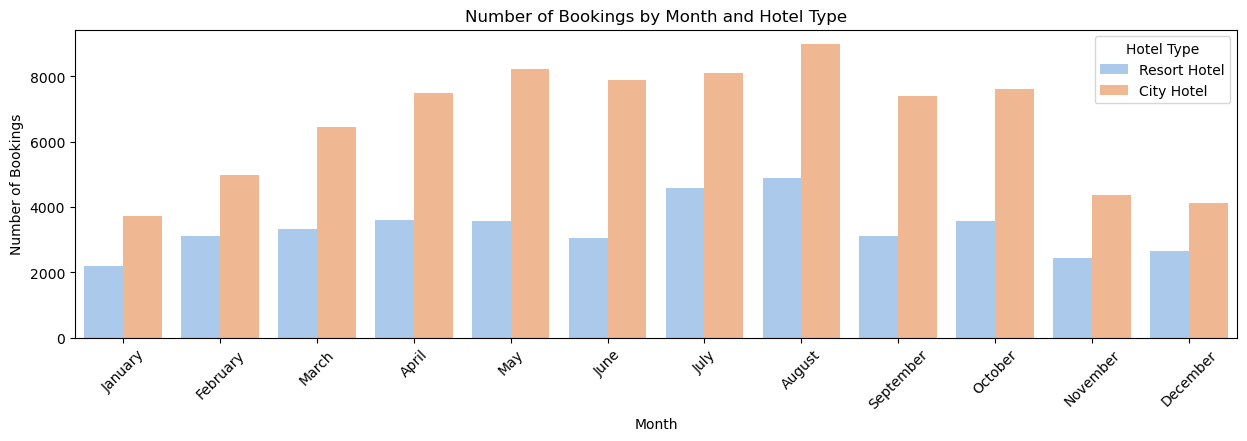

In [51]:
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=months_order, ordered=True)

# Plot bookings by month and hotel type
plt.figure(figsize=(15, 4))  
sns.countplot(x='arrival_date_month', hue='hotel', data=data, order=data['arrival_date_month'].cat.categories, palette='pastel')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.title('Number of Bookings by Month and Hotel Type')
plt.legend(title='Hotel Type')
plt.show()

C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


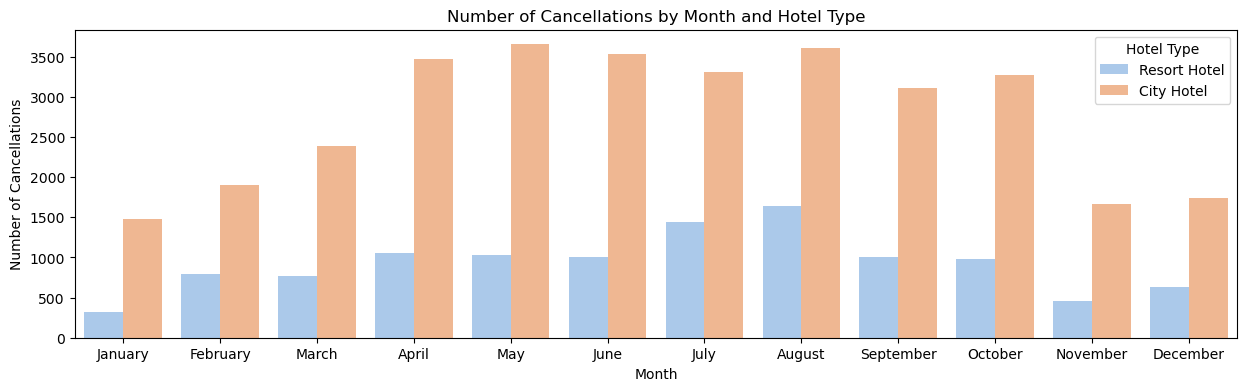

In [52]:
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=months_order, ordered=True)
# Filter the data to include only canceled bookings
canceled_data = data[data['is_canceled'] == 1]

# Bar plot for number of cancellations by month and hotel type
plt.figure(figsize=(15, 4))
plot = sns.countplot(data=canceled_data, x='arrival_date_month', hue='hotel', palette='pastel')
plt.title('Number of Cancellations by Month and Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.legend(title='Hotel Type')
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_12984\1057587487.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_counts = data.groupby(['hotel', 'arrival_date_month'])['hotel'].count().unstack('hotel').reset_index()
C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


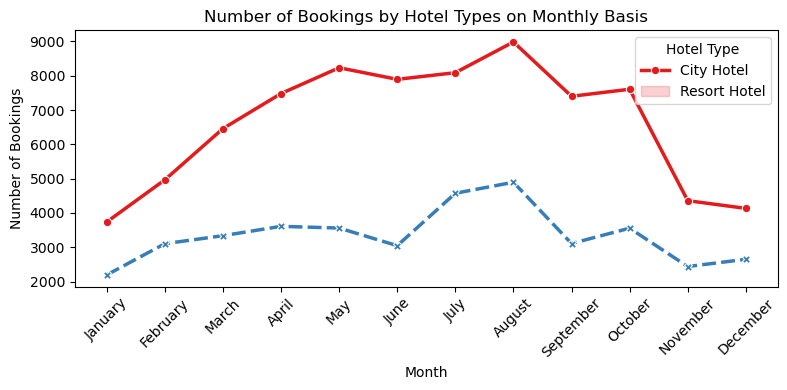

In [67]:
# Count number of bookings by hotel type and month
booking_counts = data.groupby(['hotel', 'arrival_date_month'])['hotel'].count().unstack('hotel').reset_index()
booking_counts = booking_counts.melt(id_vars='arrival_date_month', var_name='hotel', value_name='count')
booking_counts = booking_counts.pivot(index='arrival_date_month', columns='hotel', values='count').reindex(month_order)

# Plotting number of bookings by hotel types on monthly basis
plt.figure(figsize=(8,4))
sns.lineplot(data=booking_counts, markers=True, palette='Set1', linewidth=2.5)
plt.title('Number of Bookings by Hotel Types on Monthly Basis')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Hotel Type', loc='upper right', labels=booking_counts.columns)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

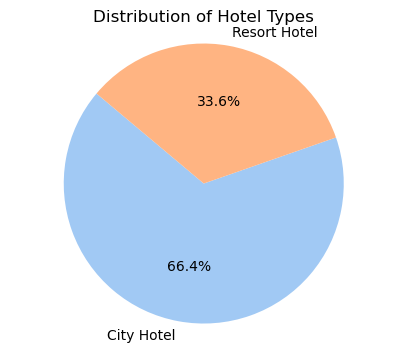

In [53]:
# Pie chart for hotel types
hotel_type_counts = data['hotel'].value_counts()

# Create the pie chart
plt.figure(figsize=(5,4))
plt.pie(hotel_type_counts, labels=hotel_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Hotel Types')
plt.axis('equal') 
plt.show()

## Outlier Analysis

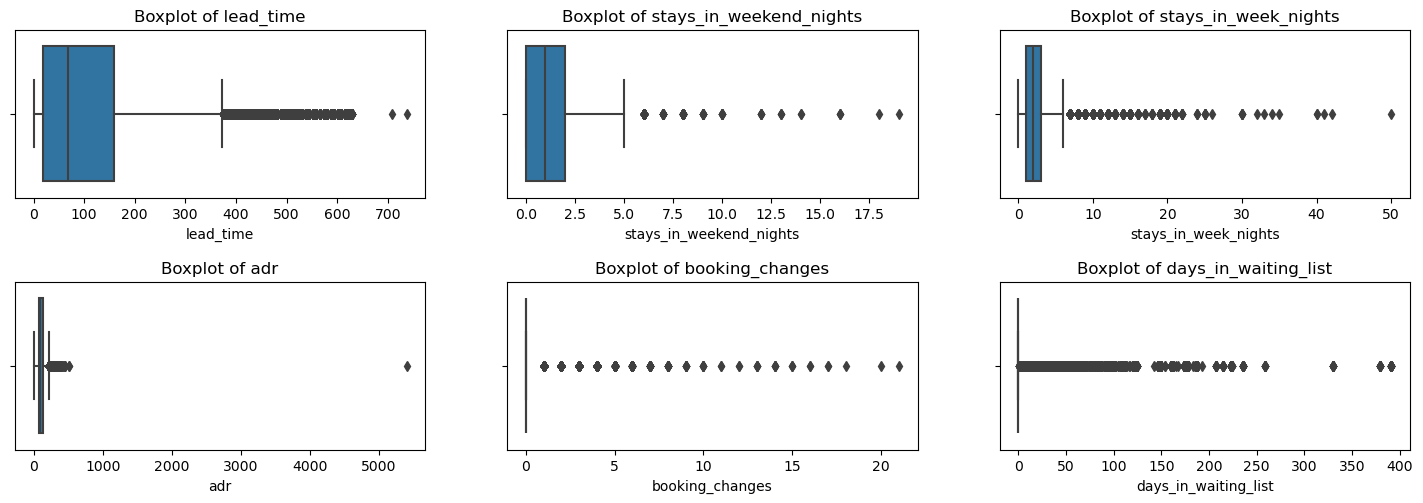

In [21]:
# Define numerical columns for outlier analysis
numerical_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                      'adr', 'booking_changes', 'days_in_waiting_list']

plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.5)

# Iterate through numerical columns and create boxplots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

# Display the plot
plt.show()


C:\Users\PMLS\.idlerc\ANACONDA\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


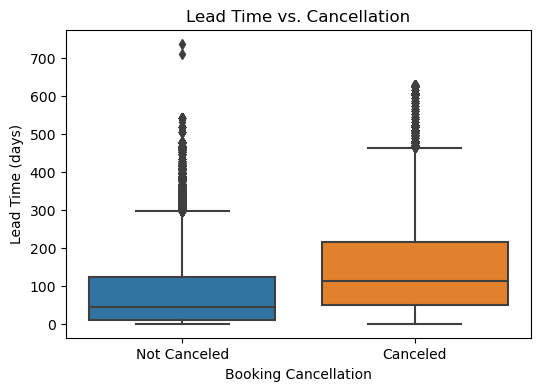

In [46]:
# Lead time vs. cancellation rate
plt.figure(figsize=(6,4))
sns.boxplot(x='is_canceled', y='lead_time', data=data)
plt.title('Lead Time vs. Cancellation')
plt.xlabel('Booking Cancellation')
plt.ylabel('Lead Time (days)')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

## Customer Prefrences Analysis

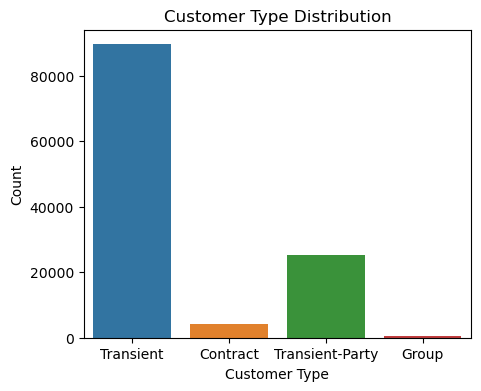

In [56]:
# Customer type distribution
plt.figure(figsize=(5,4))
sns.countplot(x='customer_type', data=data)
plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

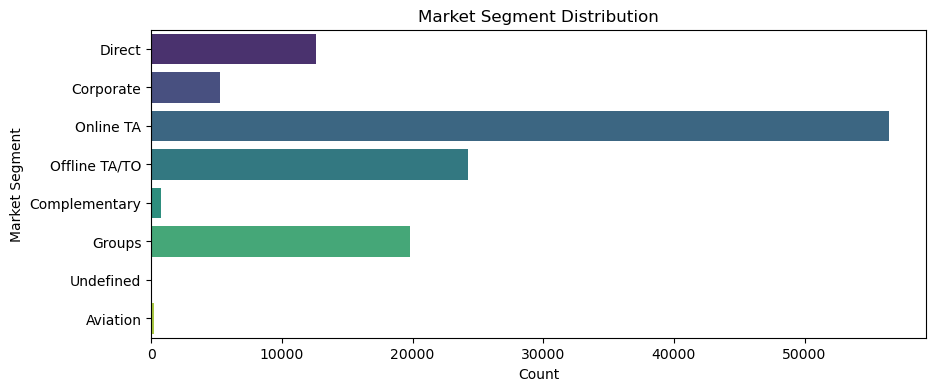

In [60]:
# Plotting Market Segment Distribution Horizontally
plt.figure(figsize=(10,4))
sns.countplot(y='market_segment', data=data, palette='viridis')
plt.title('Market Segment Distribution')
plt.xlabel('Count')
plt.ylabel('Market Segment')
plt.xticks(rotation=0)
plt.show()

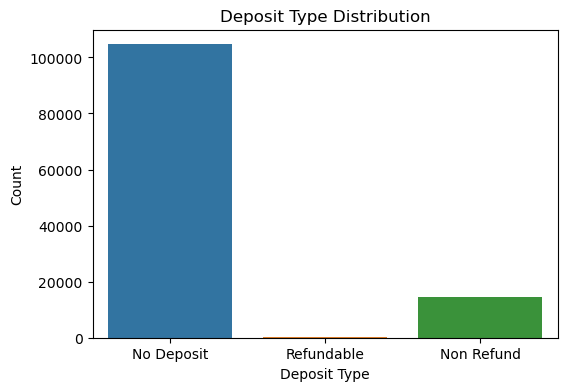

In [63]:
# Deposit type distribution
plt.figure(figsize=(6,4))
sns.countplot(x='deposit_type', data=data)
plt.title('Deposit Type Distribution')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_12984\4080971538.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='market_segment', y='is_canceled', data=cancellation_rate, ci=None)


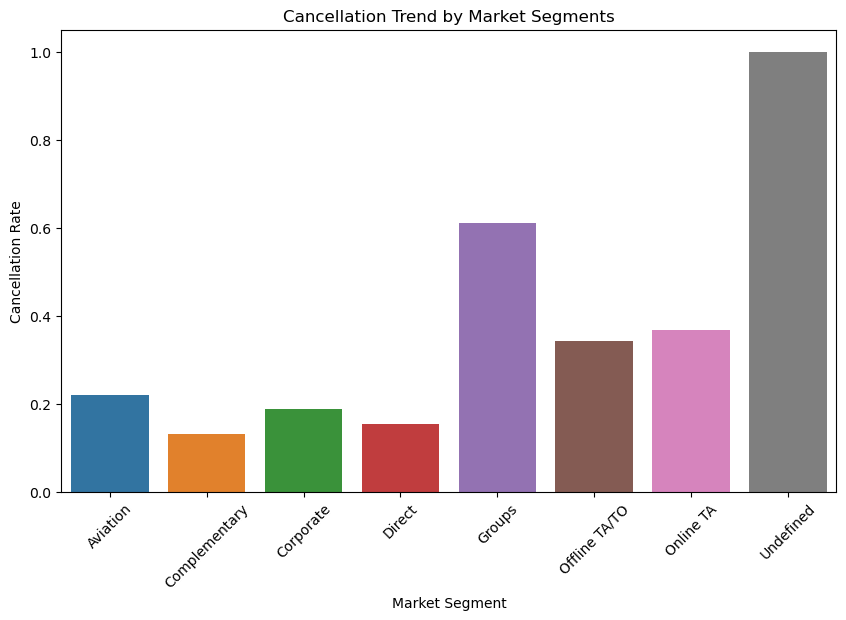

In [65]:
# Ensure 'is_canceled' is numeric (if needed)
data['is_canceled'] = pd.to_numeric(data['is_canceled'], errors='coerce')

# Calculate cancellation rate by market segment
cancellation_rate = data.groupby('market_segment')['is_canceled'].mean().reset_index()

# Plotting cancellation trend by market segments
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='is_canceled', data=cancellation_rate, ci=None)
plt.title('Cancellation Trend by Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_12984\490496121.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='customer_type', y='is_canceled', data=cancellation_rate, ci=None)


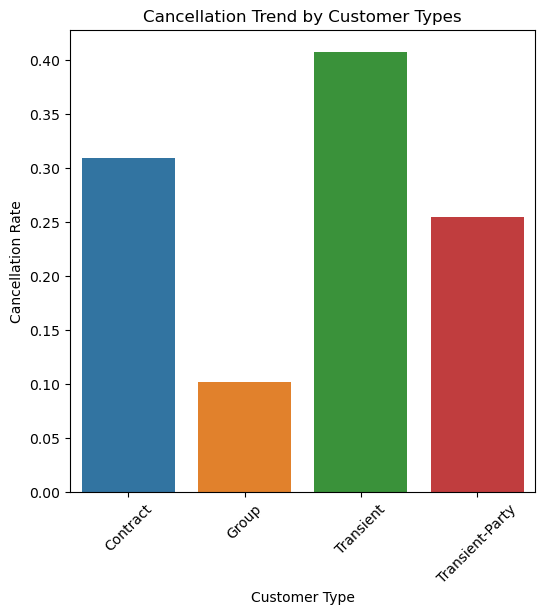

In [66]:
# Calculate cancellation rate by customer type
cancellation_rate = data.groupby('customer_type')['is_canceled'].mean().reset_index()

# Plotting cancellation trend by customer types
plt.figure(figsize=(6, 6))
sns.barplot(x='customer_type', y='is_canceled', data=cancellation_rate, ci=None)
plt.title('Cancellation Trend by Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

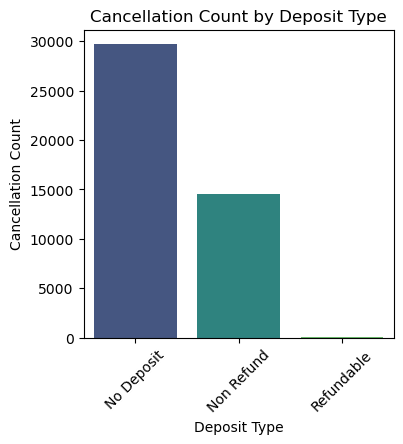

In [70]:

# Calculate cancellation count by deposit type
cancellation_counts = data[data['is_canceled'] == 1]['deposit_type'].value_counts().reset_index()
cancellation_counts.columns = ['deposit_type', 'count']

# Plotting cancellation count by deposit type
plt.figure(figsize=(4, 4))
sns.barplot(x='deposit_type', y='count', data=cancellation_counts, palette='viridis')
plt.title('Cancellation Count by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Count')
plt.xticks(rotation=45)
plt.show()


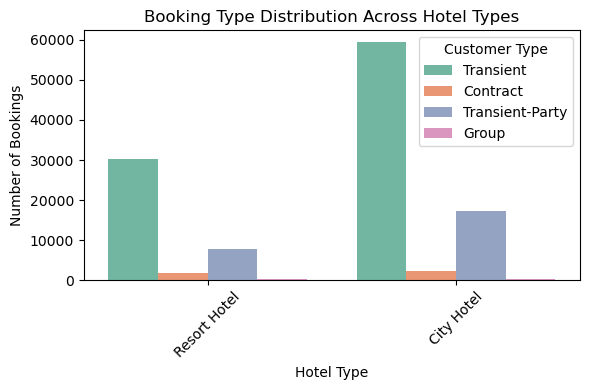

In [71]:
# Plotting booking type distribution across hotel types
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='hotel', hue='customer_type', palette='Set2')
plt.title('Booking Type Distribution Across Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Customer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

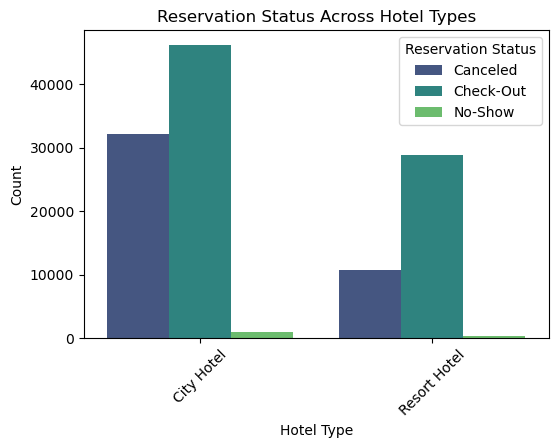

In [72]:
# Count reservation statuses by hotel type
reservation_status_counts = data.groupby(['hotel', 'reservation_status']).size().reset_index(name='count')

# Plotting reservation status across hotel types
plt.figure(figsize=(6,4))
sns.barplot(x='hotel', y='count', hue='reservation_status', data=reservation_status_counts, palette='viridis')
plt.title('Reservation Status Across Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(title='Reservation Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

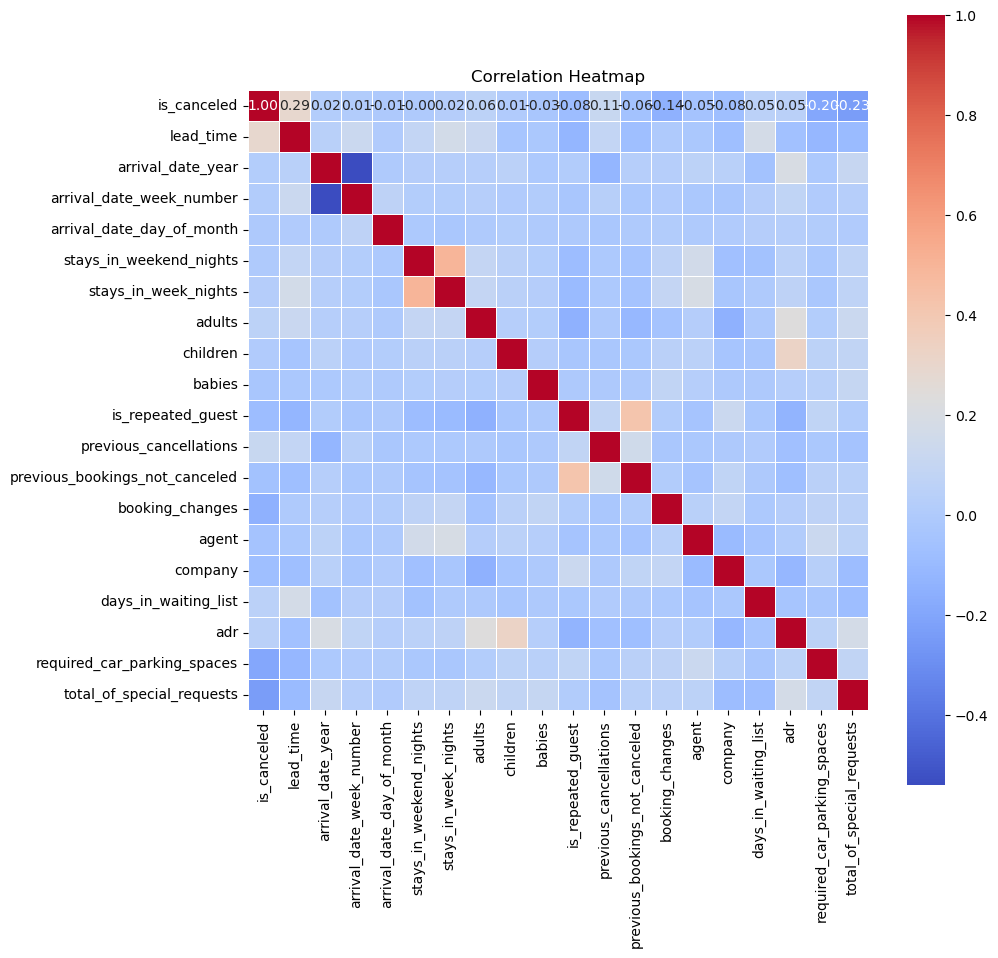

In [73]:
# Select numerical columns for correlation analysis
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [74]:
import os

output_file_path = r"C:\Users\PMLS\OneDrive\Desktop\CAREER\CODEX CUE INTERNSHIP\New folder (2)\filename.csv"
# Extract the directory from the file path
output_directory = os.path.dirname(output_file_path)

# Check if the directory exists, and if not, create it
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
data.to_csv(output_file_path, index=False)

print(f"File saved successfully to {output_file_path}")


File saved successfully to C:\Users\PMLS\OneDrive\Desktop\CAREER\CODEX CUE INTERNSHIP\New folder (2)\filename.csv
